# import dados

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Machine Learning/Machine Learning: classificação por trás dos panos/Customer-Churn.csv')
dados.head()

NameError: ignored

# Diferentes Variaveis

### transformando as variaveis categóricas em numéricos

In [ ]:
# modificando de forma manual
traducao_dic = {'Sim':1,
                'Nao':0 }

#modificar apenas colunas que possuam  SIM e NÂO
dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

Conjuge  Dependentes  TelefoneFixo  PagamentoOnline  Churn
0        1            0             0                1      0
1        0            0             1                0      0
2        0            0             1                1      1
3        0            0             0                0      0
4        0            0             1                1      1

In [ ]:
# modificando de forma automática
# transformando pelo get_dummies

dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],axis=1))
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head()

Conjuge  Dependentes  TelefoneFixo  PagamentoOnline  Churn  Maior65Anos  \
0        1            0             0                1      0            0   
1        0            0             1                0      0            0   
2        0            0             1                1      1            0   
3        0            0             0                0      0            0   
4        0            0             1                1      1            0   

   MesesDeContrato  ContaMensal  VariasLinhasTelefonicas_Nao  \
0                1        29.85                            0   
1               34        56.95                            1   
2                2        53.85                            1   
3               45        42.30                            0   
4                2        70.70                            1   

   VariasLinhasTelefonicas_SemServicoTelefonico  ...  StreamingDeFilmes_Nao  \
0                                             1  ...                      1   
1                                             0  ...                      1   
2                                             0  ...                      1   
3                                             1  ...                      1   
4                                             0  ...                      1   

   StreamingDeFilmes_SemServicoDeInternet  StreamingDeFilmes_Sim  \
0                                       0                      0   
1                                       0                      0   
2                                       0                      0   
3                                       0                      0   
4                                       0                      0   

   TipoDeContrato_DoisAnos  TipoDeContrato_Mensalmente  TipoDeContrato_UmAno  \
0                        0                           1                     0   
1                        0                           0                     1   
2                        0                           1                     0   
3                        0                           0                     1   
4                        0                           1                     0   

   FormaDePagamento_CartaoDeCredito  FormaDePagamento_ChequeDigital  \
0                                 0                               1   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               1   

   FormaDePagamento_ChequePapel  FormaDePagamento_DebitoEmConta  
0                             0                               0  
1                             1                               0  
2                             1                               0  
3                             0                               1  
4                             0                               0  

[5 rows x 39 columns]

# Definição Formal

Informações para classificação:

X = inputs (dados de entrada)

Y = outputs (dados de saída)

In [ ]:
#DICA
pd.set_option('display.max_columns', 39)
dados_final.head()

Conjuge  Dependentes  TelefoneFixo  PagamentoOnline  Churn  Maior65Anos  \
0        1            0             0                1      0            0   
1        0            0             1                0      0            0   
2        0            0             1                1      1            0   
3        0            0             0                0      0            0   
4        0            0             1                1      1            0   

   MesesDeContrato  ContaMensal  VariasLinhasTelefonicas_Nao  \
0                1        29.85                            0   
1               34        56.95                            1   
2                2        53.85                            1   
3               45        42.30                            0   
4                2        70.70                            1   

   VariasLinhasTelefonicas_SemServicoTelefonico  VariasLinhasTelefonicas_Sim  \
0                                             1                            0   
1                                             0                            0   
2                                             0                            0   
3                                             1                            0   
4                                             0                            0   

   ServicoDeInternet_DSL  ServicoDeInternet_FibraOptica  \
0                      1                              0   
1                      1                              0   
2                      1                              0   
3                      1                              0   
4                      0                              1   

   ServicoDeInternet_Nao  SegurancaOnline_Nao  \
0                      0                    1   
1                      0                    0   
2                      0                    0   
3                      0                    0   
4                      0                    1   

   SegurancaOnline_SemServicoDeInternet  SegurancaOnline_Sim  \
0                                     0                    0   
1                                     0                    1   
2                                     0                    1   
3                                     0                    1   
4                                     0                    0   

   BackupOnline_Nao  BackupOnline_SemServicoDeInternet  BackupOnline_Sim  \
0                 0                                  0                 1   
1                 1                                  0                 0   
2                 0                                  0                 1   
3                 1                                  0                 0   
4                 1                                  0                 0   

   SeguroNoDispositivo_Nao  SeguroNoDispositivo_SemServicoDeInternet  \
0                        1                                         0   
1                        0                                         0   
2                        1                                         0   
3                        0                                         0   
4                        1                                         0   

   SeguroNoDispositivo_Sim  SuporteTecnico_Nao  \
0                        0                   1   
1                        1                   1   
2                        0                   1   
3                        1                   0   
4                        0                   1   

   SuporteTecnico_SemServicoDeInternet  SuporteTecnico_Sim  TVaCabo_Nao  \
0                                    0                   0            1   
1                                    0                   0            1   
2                                    0                   0            1   
3                                    0                   1            1   
4                                    0                   0         

In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]


# Balanceamento dos dados

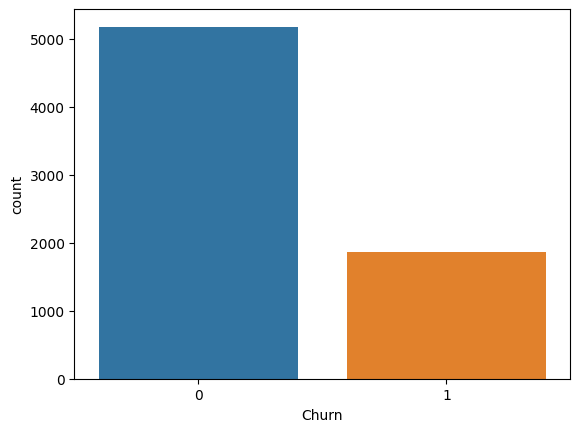

In [ ]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [ ]:
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [ ]:
#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [ ]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [ ]:
#verificação 1 - junção dos dados
dados_final.head(2)

Conjuge  Dependentes  TelefoneFixo  PagamentoOnline  Churn  Maior65Anos  \
0        1            0             0                1      0            0   
1        0            0             1                0      0            0   

   MesesDeContrato  ContaMensal  VariasLinhasTelefonicas_Nao  \
0                1        29.85                            0   
1               34        56.95                            1   

   VariasLinhasTelefonicas_SemServicoTelefonico  VariasLinhasTelefonicas_Sim  \
0                                             1                            0   
1                                             0                            0   

   ServicoDeInternet_DSL  ServicoDeInternet_FibraOptica  \
0                      1                              0   
1                      1                              0   

   ServicoDeInternet_Nao  SegurancaOnline_Nao  \
0                      0                    1   
1                      0                    0   

   SegurancaOnline_SemServicoDeInternet  SegurancaOnline_Sim  \
0                                     0                    0   
1                                     0                    1   

   BackupOnline_Nao  BackupOnline_SemServicoDeInternet  BackupOnline_Sim  \
0                 0                                  0                 1   
1                 1                                  0                 0   

   SeguroNoDispositivo_Nao  SeguroNoDispositivo_SemServicoDeInternet  \
0                        1                                         0   
1                        0                                         0   

   SeguroNoDispositivo_Sim  SuporteTecnico_Nao  \
0                        0                   1   
1                        1                   1   

   SuporteTecnico_SemServicoDeInternet  SuporteTecnico_Sim  TVaCabo_Nao  \
0                                    0                   0            1   
1                                    0                   0            1   

   TVaCabo_SemServicoDeInternet  TVaCabo_Sim  StreamingDeFilmes_Nao  \
0                             0            0                      1   
1                             0            0                      1   

   StreamingDeFilmes_SemServicoDeInternet  StreamingDeFilmes_Sim  \
0                                       0                      0   
1                                       0                      0   

   TipoDeContrato_DoisAnos  TipoDeContrato_Mensalmente  TipoDeContrato_UmAno  \
0                        0                           1                     0   
1                        0                           0                     1   

   FormaDePagamento_CartaoDeCredito  FormaDePagamento_ChequeDigital  \
0                                 0                               1   
1                                 0                               0   

   FormaDePagamento_ChequePapel  FormaDePagamento_DebitoEmConta  
0                             0                               0  
1                             1                               0

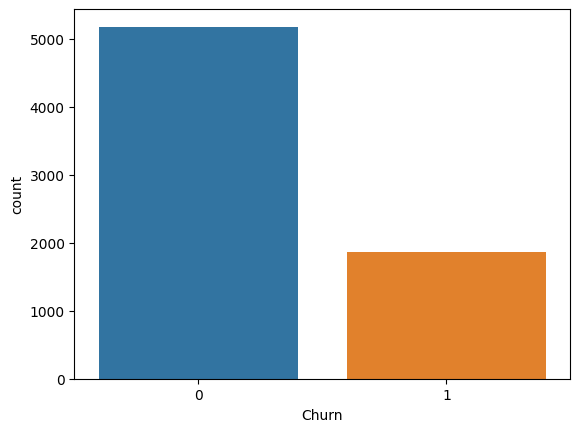

In [ ]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dados_final)

In [ ]:
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

- caso se o **K** for muito pequeno pode ocasionar o ***Overfitting***

- caso se o **K** for muito grande pode ocasionar o ***Underfitting***




# Normalizando os dados

In [ ]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [ ]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [ ]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [ ]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.03453023, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 , -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
        -0.54480692,  1.88720123]])

In [ ]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.96662231, -0.65401193,  0.32743831,  0.8297975 , -0.43991649,
        -1.31816495, -0.82630172,  1.03806605, -0.32743831, -0.85417615,
        -0.72373975,  1.12910177, -0.52592737,  1.00669571, -0.52592737,
        -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
         1.90140322, -0.72396752, -0.98632101,  1.90140322, -0.63943864,
         1.2273572 , -0.52592737, -0.79013171, -0.80874158, -0.52592737,
         1.25617071, -0.56297505, -1.1059698 ,  1.94458183, -0.52504733,
        -0.71102597, -0.54480692,  1.88720123]])

# Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [ ]:
import numpy as np

In [ ]:
a = Xmaria_normalizado

b = X_normalizado[0]

In [ ]:
#1 - começamos subtraindo
a - b

array([[-2.00115254,  0.        ,  3.3814487 ,  0.        ,  0.        ,
        -0.04072036,  0.3340212 ,  2.00139589, -3.3814487 ,  0.        ,
        -2.10545189,  2.01476153,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.42733059,  0.        , -2.00018971,  2.42733059,  0.        ,
         0.        ,  0.        ,  0.        , -2.0452305 ,  0.        ,
         2.05224086,  0.        , -2.01015362,  2.45883121,  0.        ,
        -2.11744436,  0.        ,  2.41708643]])

In [ ]:
#2 - depois realizamos a exponenciação
np.square(a-b)

array([[4.00461149e+00, 0.00000000e+00, 1.14341953e+01, 0.00000000e+00,
        0.00000000e+00, 1.65814802e-03, 1.11570160e-01, 4.00558550e+00,
        1.14341953e+01, 0.00000000e+00, 4.43292768e+00, 4.05926401e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.89193381e+00, 0.00000000e+00, 4.00075888e+00, 5.89193381e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.18296779e+00, 0.00000000e+00, 4.21169253e+00, 0.00000000e+00,
        4.04071758e+00, 6.04585093e+00, 0.00000000e+00, 4.48357062e+00,
        0.00000000e+00, 5.84230682e+00]])

In [ ]:
#3 - a soma
sum = np.sum(np.square(a-b))

In [ ]:
#4 - então tiramos a raiz e temos nossa distância
np.sqrt(sum)

9.169282435541762

# Implementando o modelo

In [ ]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

**Treino e Teste**

In [ ]:
X_treino

array([[-0.96662231, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231,  1.5290241 ,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 ,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023,  1.5290241 , -3.05401039, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ]])

In [ ]:
y_treino

1479    0
2377    0
6613    0
6468    0
2668    1
       ..
5218    0
4060    0
1346    1
3454    0
3582    0
Name: Churn, Length: 4930, dtype: int64

In [ ]:
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
median = np.median(X_treino)

# Índice Gini
em um nó de uma árvore de decisão é calculado usando a seguinte fórmula matemática:

$$ G(node) = \sum_{k=1}^{C} pk(1 - pk) $$

- G(node): É o índice de Gini do nó atual. Ele representa a medida de impureza desse nó, ou seja, a medida de quão misturadas estão as classes no nó. Quanto menor o valor de Gini, mais puro é o nó, ou seja, mais homogêneas são as classes no nó.

- C: É o número de classes diferentes no conjunto de dados. Por exemplo, se tivermos um problema de classificação binária (duas classes, como "sim" e "não"), CC será igual a 2.

- pk​: Representa a proporção das amostras da classe kk no nó. É calculada dividindo o número de amostras da classe kk pelo número total de amostras no nó.

A fórmula do índice de Gini é uma expressão matemática que calcula a soma ponderada das impurezas das classes presentes no nó. Quanto mais impuras (misturadas) as classes no nó, maior será o valor do índice de Gini.

#Entropia
em um nó de uma árvore de decisão é calculada usando a seguinte fórmula matemática:

$$
\text{Entropia} = - \sum_{i=1}^{C} pk\log_2(pk)
$$

- Entropia: É o valor da entropia no nó atual. A entropia mede o grau de impureza dos dados no nó. Quanto maior o valor da entropia, mais incertos ou misturados estão os dados em relação às classes.

- C: É o número de classes diferentes no conjunto de dados. Por exemplo, em um problema de classificação binária (duas classes, como "sim" e "não"), CC será igual a 2.

- pk​: Representa a proporção de amostras da classe kk no nó. Essa proporção é calculada dividindo o número de amostras da classe kk pelo número total de amostras no nó.

A fórmula da entropia é uma expressão matemática que calcula a soma ponderada dos valores pklog⁡(pk)pk​log(pk) para cada classe presente no nó. Quanto mais uniforme ou equilibrada é a distribuição das classes, menor será o valor da entropia.


In [ ]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#instaciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy',random_state=42)

In [ ]:
#treinar o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#verificar a importância de cada atributo
dtc.feature_importances_

array([0.03168742, 0.01862901, 0.00064085, 0.02675693, 0.0208788 ,
       0.2056003 , 0.29546501, 0.0061786 , 0.00273035, 0.00747536,
       0.        , 0.04908356, 0.        , 0.01609395, 0.        ,
       0.00722833, 0.01220706, 0.        , 0.01248286, 0.01138295,
       0.0006673 , 0.0095669 , 0.01841631, 0.        , 0.00650511,
       0.00385849, 0.        , 0.00666929, 0.00517146, 0.        ,
       0.00665371, 0.00473251, 0.15803541, 0.00348686, 0.01414378,
       0.01601964, 0.01064163, 0.01091026])

In [ ]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [ ]:
predito_ArvoreDecisao

array([1, 0, 0, ..., 1, 0, 0])